In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv(r"C:/Users/arnau/OneDrive/Bureau/Dossiers/A3S1/Data & IA/MiniProjects/titanic/train.csv")

In [3]:
titanic.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
titanic.dropna(subset=['Embarked'], inplace=True)
titanic.fillna({'Age': titanic['Age'].median()}, inplace=True)

In [4]:
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked', 'Pclass'])

In [5]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [7]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7865168539325843
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       109
           1       0.71      0.75      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



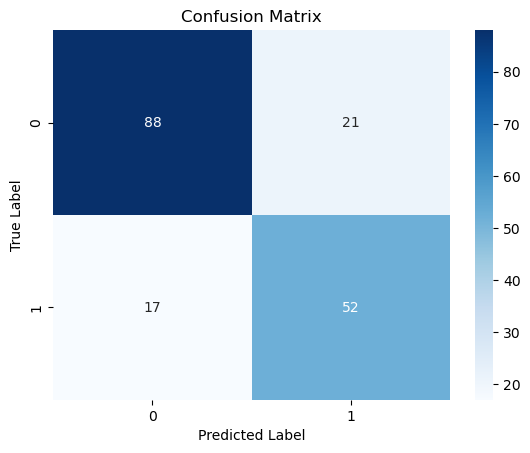

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

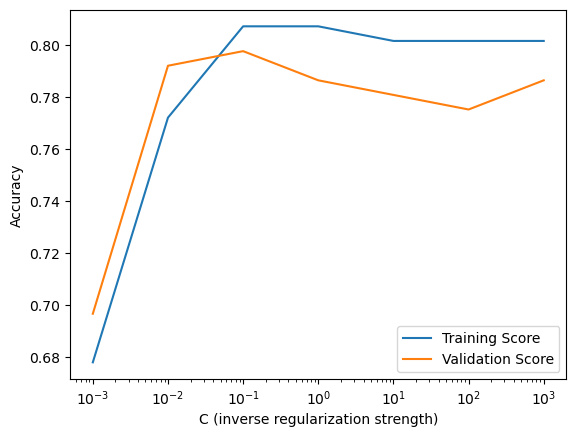

In [9]:
train_scores = []
val_scores = []
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    val_scores.append(model.score(X_test, y_test))
plt.plot(C_values, train_scores, label="Training Score")
plt.plot(C_values, val_scores, label="Validation Score")
plt.xscale("log")
plt.xlabel("C (inverse regularization strength)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()